In [7]:
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
df = pd.read_excel('./Opportunities.xlsx')

In [5]:
df

,Opportunity ID,Business Account,Contact ID,Estimated Close Date,Status,Stage,Probability,Estimated amount,Amount received,Difference,...,Theorical payment amount 3,Theorical payment date 4,Theorical payment amount 4,Theorical payment date 5,Theorical payment amount 5,Created On,Last Modified Date,Actual Close Date,Assignment Date,Branch ID
0,6387,C00037,35334.0,2023-11-27,New,Won,100,9000.0,NaN,-9000.0,...,NaN,NaT,NaN,NaT,NaN,2023-10-11 10:59:07.310,2023-10-11 10:59:07.310,NaT,2023-10-11 10:58:16.137,SDLV
1,6386,C01254,36240.0,2023-10-11,New,Won,100,9000.0,NaN,-9000.0,...,NaN,NaT,NaN,NaT,NaN,2023-10-11 10:55:50.773,2023-10-11 10:55:50.773,NaT,2023-10-11 10:53:26.857,SDLV
2,6385,C21512,47640.0,2023-10-11,New,Oral agreement,80,140.0,NaN,-140.0,...,NaN,NaT,NaN,NaT,NaN,2023-10-11 08:53:52.533,2023-10-11 08:54:37.860,NaT,2023-10-11 08:52:52.257,SDLV
3,6384,C21509,47636.0,2023-10-11,New,Oral agreement,80,350.0,NaN,-350.0,...,NaN,NaT,NaN,NaT,NaN,2023-10-11 08:42:41.140,2023-10-11 08:42:41.140,NaT,2023-10-11 08:41:27.513,SDLV
4,6383,C21508,47635.0,2023-10-10,New,Oral agreement,80,120.0,NaN,-120.0,...,NaN,NaT,NaN,NaT,NaN,2023-10-10 15:54:31.827,2023-10-10 15:56:12.527,NaT,2023-10-10 15:53:17.550,SDLV
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,5,C00036,NaN,2020-01-01,Won,Won,100,1059.0,NaN,-1059.0,...,NaN,NaT,NaN,NaT,NaN,2021-02-12 06:10:11.650,2022-12-14 09:45:10.033,2022-12-14,2021-02-12 06:10:11.487,SDLV
5982,4,C00024,NaN,2020-01-01,Won,Won,200,7500.0,7500.0,0.0,...,NaN,NaT,NaN,NaT,NaN,2021-02-12 06:10:11.167,2021-11-17 15:22:01.390,2021-11-17,2021-02-12 06:10:09.940,SDLV
5983,3,C00011,NaN,2020-01-01,Won,Won,100,35000.0,NaN,-35000.0,...,NaN,NaT,NaN,NaT,NaN,2021-02-12 06:10:09.633,2021-03-19 07:01:54.480,2021-03-19,2021-02-12 06:10:09.520,SDLV
5984,2,C00331,NaN,2020-01-01,Won,Won,100,20000.0,NaN,-20000.0,...,NaN,NaT,NaN,NaT,NaN,2021-02-12 06:10:09.020,2021-08-25 11:52:18.820,2021-08-25,NaT,SDLV


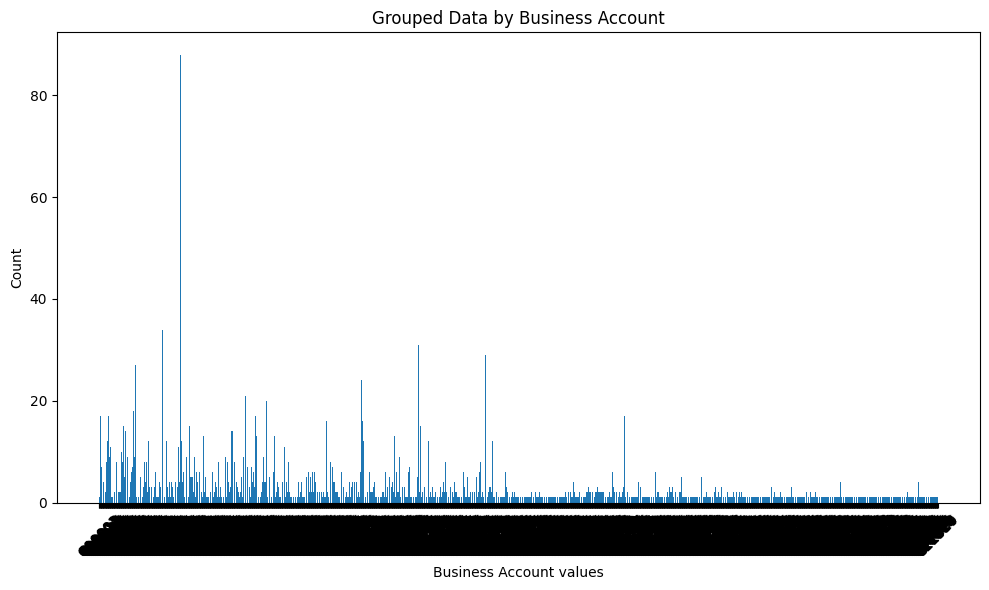

In [8]:
grouped_data = df.groupby('Business Account').size().reset_index(name='count')

# Create a bar chart to visualize the grouped data
plt.figure(figsize=(10, 6))
plt.bar(grouped_data['Business Account'], grouped_data['count'])
plt.xlabel('Business Account values')
plt.ylabel('Count')
plt.title('Grouped Data by Business Account')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Display the plot
plt.tight_layout()
plt.show()

In [12]:
# Group the original DataFrame by the 'Stage' column
stage = df.groupby('Stage').size().reset_index(name='Count')

In [13]:
stage

,Stage,Count
0,Advanced Prospect,106
1,Dossier posed,118
2,Initial Prospect,545
3,Lost,34
4,Oral agreement,1081
5,Won,4102


In [14]:
# Group the original DataFrame by the 'Stage' column
status = df.groupby('Status').size().reset_index(name='Count')

In [15]:
status

,Status,Count
0,Lost,271
1,New,1500
2,Open,107
3,Won,4108


In [16]:
# Group the original DataFrame by the 'Stage' column
business_account = df.groupby('Business Account').size().reset_index(name='Count')

In [17]:
business_account

,Business Account,Count
0,C00001,4
1,C00002,1
2,C00004,4
3,C00005,1
4,C00011,17
...,...,...
2058,C21527,1
2059,C21528,1
2060,C21529,1
2061,C21530,1


In [18]:
business_account = business_account.sort_values(by='Count', ascending=False)

In [20]:
business_account

,Business Account,Count
200,C00366,88
56,C00094,41
362,C00644,39
568,C01196,35
156,C00290,34
...,...,...
1102,C06225,1
1101,C06224,1
1100,C06223,1
1099,C06222,1


In [21]:
summary_stats = business_account['Count'].describe()

In [22]:
summary_stats

count    2063.000000
mean        2.900630
std         4.448576
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max        88.000000
Name: Count, dtype: float64

In [25]:
# Create a dictionary to map 'status' values to their corresponding weights
status_weights = {'Won': 1.0, 'Open': 0.8, 'New': 0.6, 'Lost': 0.4}

# Use the 'apply' function to create the 'status_weight' column
df['status_weight'] = df['Status'].apply(lambda status: status_weights.get(status, 0.0))


In [26]:
df

,Opportunity ID,Business Account,Contact ID,Estimated Close Date,Status,Stage,Probability,Estimated amount,Amount received,Difference,...,Theorical payment date 4,Theorical payment amount 4,Theorical payment date 5,Theorical payment amount 5,Created On,Last Modified Date,Actual Close Date,Assignment Date,Branch ID,status_weight
0,6387,C00037,35334.0,2023-11-27,New,Won,100,9000.0,NaN,-9000.0,...,NaT,NaN,NaT,NaN,2023-10-11 10:59:07.310,2023-10-11 10:59:07.310,NaT,2023-10-11 10:58:16.137,SDLV,0.6
1,6386,C01254,36240.0,2023-10-11,New,Won,100,9000.0,NaN,-9000.0,...,NaT,NaN,NaT,NaN,2023-10-11 10:55:50.773,2023-10-11 10:55:50.773,NaT,2023-10-11 10:53:26.857,SDLV,0.6
2,6385,C21512,47640.0,2023-10-11,New,Oral agreement,80,140.0,NaN,-140.0,...,NaT,NaN,NaT,NaN,2023-10-11 08:53:52.533,2023-10-11 08:54:37.860,NaT,2023-10-11 08:52:52.257,SDLV,0.6
3,6384,C21509,47636.0,2023-10-11,New,Oral agreement,80,350.0,NaN,-350.0,...,NaT,NaN,NaT,NaN,2023-10-11 08:42:41.140,2023-10-11 08:42:41.140,NaT,2023-10-11 08:41:27.513,SDLV,0.6
4,6383,C21508,47635.0,2023-10-10,New,Oral agreement,80,120.0,NaN,-120.0,...,NaT,NaN,NaT,NaN,2023-10-10 15:54:31.827,2023-10-10 15:56:12.527,NaT,2023-10-10 15:53:17.550,SDLV,0.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,5,C00036,NaN,2020-01-01,Won,Won,100,1059.0,NaN,-1059.0,...,NaT,NaN,NaT,NaN,2021-02-12 06:10:11.650,2022-12-14 09:45:10.033,2022-12-14,2021-02-12 06:10:11.487,SDLV,1.0
5982,4,C00024,NaN,2020-01-01,Won,Won,200,7500.0,7500.0,0.0,...,NaT,NaN,NaT,NaN,2021-02-12 06:10:11.167,2021-11-17 15:22:01.390,2021-11-17,2021-02-12 06:10:09.940,SDLV,1.0
5983,3,C00011,NaN,2020-01-01,Won,Won,100,35000.0,NaN,-35000.0,...,NaT,NaN,NaT,NaN,2021-02-12 06:10:09.633,2021-03-19 07:01:54.480,2021-03-19,2021-02-12 06:10:09.520,SDLV,1.0
5984,2,C00331,NaN,2020-01-01,Won,Won,100,20000.0,NaN,-20000.0,...,NaT,NaN,NaT,NaN,2021-02-12 06:10:09.020,2021-08-25 11:52:18.820,2021-08-25,NaT,SDLV,1.0


In [27]:
# Create a dictionary to map 'status' values to their corresponding weights
stage_weights = {'Won': 1.0, 'Oral agreement': 0.8, 'Advanced prospect': 0.6, 'Initial Prospect': 0.4, 'Dossier Posed': 0.2}

# Use the 'apply' function to create the 'status_weight' column
df['stage_weight'] = df['Stage'].apply(lambda stage: stage_weights.get(stage, 0.0))

In [28]:
df

,Opportunity ID,Business Account,Contact ID,Estimated Close Date,Status,Stage,Probability,Estimated amount,Amount received,Difference,...,Theorical payment amount 4,Theorical payment date 5,Theorical payment amount 5,Created On,Last Modified Date,Actual Close Date,Assignment Date,Branch ID,status_weight,stage_weight
0,6387,C00037,35334.0,2023-11-27,New,Won,100,9000.0,NaN,-9000.0,...,NaN,NaT,NaN,2023-10-11 10:59:07.310,2023-10-11 10:59:07.310,NaT,2023-10-11 10:58:16.137,SDLV,0.6,1.0
1,6386,C01254,36240.0,2023-10-11,New,Won,100,9000.0,NaN,-9000.0,...,NaN,NaT,NaN,2023-10-11 10:55:50.773,2023-10-11 10:55:50.773,NaT,2023-10-11 10:53:26.857,SDLV,0.6,1.0
2,6385,C21512,47640.0,2023-10-11,New,Oral agreement,80,140.0,NaN,-140.0,...,NaN,NaT,NaN,2023-10-11 08:53:52.533,2023-10-11 08:54:37.860,NaT,2023-10-11 08:52:52.257,SDLV,0.6,0.8
3,6384,C21509,47636.0,2023-10-11,New,Oral agreement,80,350.0,NaN,-350.0,...,NaN,NaT,NaN,2023-10-11 08:42:41.140,2023-10-11 08:42:41.140,NaT,2023-10-11 08:41:27.513,SDLV,0.6,0.8
4,6383,C21508,47635.0,2023-10-10,New,Oral agreement,80,120.0,NaN,-120.0,...,NaN,NaT,NaN,2023-10-10 15:54:31.827,2023-10-10 15:56:12.527,NaT,2023-10-10 15:53:17.550,SDLV,0.6,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,5,C00036,NaN,2020-01-01,Won,Won,100,1059.0,NaN,-1059.0,...,NaN,NaT,NaN,2021-02-12 06:10:11.650,2022-12-14 09:45:10.033,2022-12-14,2021-02-12 06:10:11.487,SDLV,1.0,1.0
5982,4,C00024,NaN,2020-01-01,Won,Won,200,7500.0,7500.0,0.0,...,NaN,NaT,NaN,2021-02-12 06:10:11.167,2021-11-17 15:22:01.390,2021-11-17,2021-02-12 06:10:09.940,SDLV,1.0,1.0
5983,3,C00011,NaN,2020-01-01,Won,Won,100,35000.0,NaN,-35000.0,...,NaN,NaT,NaN,2021-02-12 06:10:09.633,2021-03-19 07:01:54.480,2021-03-19,2021-02-12 06:10:09.520,SDLV,1.0,1.0
5984,2,C00331,NaN,2020-01-01,Won,Won,100,20000.0,NaN,-20000.0,...,NaN,NaT,NaN,2021-02-12 06:10:09.020,2021-08-25 11:52:18.820,2021-08-25,NaT,SDLV,1.0,1.0


In [35]:
df['combintaed_weights'] = df['status_weight'] * df['stage_weight']

In [36]:
df

,Opportunity ID,Business Account,Contact ID,Estimated Close Date,Status,Stage,Probability,Estimated amount,Amount received,Difference,...,Theorical payment date 5,Theorical payment amount 5,Created On,Last Modified Date,Actual Close Date,Assignment Date,Branch ID,status_weight,stage_weight,combintaed_weights
0,6387,C00037,35334.0,2023-11-27,New,Won,100,9000.0,NaN,-9000.0,...,NaT,NaN,2023-10-11 10:59:07.310,2023-10-11 10:59:07.310,NaT,2023-10-11 10:58:16.137,SDLV,0.6,1.0,0.60
1,6386,C01254,36240.0,2023-10-11,New,Won,100,9000.0,NaN,-9000.0,...,NaT,NaN,2023-10-11 10:55:50.773,2023-10-11 10:55:50.773,NaT,2023-10-11 10:53:26.857,SDLV,0.6,1.0,0.60
2,6385,C21512,47640.0,2023-10-11,New,Oral agreement,80,140.0,NaN,-140.0,...,NaT,NaN,2023-10-11 08:53:52.533,2023-10-11 08:54:37.860,NaT,2023-10-11 08:52:52.257,SDLV,0.6,0.8,0.48
3,6384,C21509,47636.0,2023-10-11,New,Oral agreement,80,350.0,NaN,-350.0,...,NaT,NaN,2023-10-11 08:42:41.140,2023-10-11 08:42:41.140,NaT,2023-10-11 08:41:27.513,SDLV,0.6,0.8,0.48
4,6383,C21508,47635.0,2023-10-10,New,Oral agreement,80,120.0,NaN,-120.0,...,NaT,NaN,2023-10-10 15:54:31.827,2023-10-10 15:56:12.527,NaT,2023-10-10 15:53:17.550,SDLV,0.6,0.8,0.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5981,5,C00036,NaN,2020-01-01,Won,Won,100,1059.0,NaN,-1059.0,...,NaT,NaN,2021-02-12 06:10:11.650,2022-12-14 09:45:10.033,2022-12-14,2021-02-12 06:10:11.487,SDLV,1.0,1.0,1.00
5982,4,C00024,NaN,2020-01-01,Won,Won,200,7500.0,7500.0,0.0,...,NaT,NaN,2021-02-12 06:10:11.167,2021-11-17 15:22:01.390,2021-11-17,2021-02-12 06:10:09.940,SDLV,1.0,1.0,1.00
5983,3,C00011,NaN,2020-01-01,Won,Won,100,35000.0,NaN,-35000.0,...,NaT,NaN,2021-02-12 06:10:09.633,2021-03-19 07:01:54.480,2021-03-19,2021-02-12 06:10:09.520,SDLV,1.0,1.0,1.00
5984,2,C00331,NaN,2020-01-01,Won,Won,100,20000.0,NaN,-20000.0,...,NaT,NaN,2021-02-12 06:10:09.020,2021-08-25 11:52:18.820,2021-08-25,NaT,SDLV,1.0,1.0,1.00


In [37]:
business_account_by_combinated = df[['Business Account', 'combintaed_weights']]

In [38]:
business_account_by_combinated

,Business Account,combintaed_weights
0,C00037,0.60
1,C01254,0.60
2,C21512,0.48
3,C21509,0.48
4,C21508,0.48
...,...,...
5981,C00036,1.00
5982,C00024,1.00
5983,C00011,1.00
5984,C00331,1.00


In [39]:
business_account_by_combinated = business_account_by_combinated.sort_values(by='combintaed_weights', ascending=False)

In [40]:
business_account_by_combinated

,Business Account,combintaed_weights
5985,C00331,1.0
2550,C00045,1.0
4622,C00727,1.0
4621,C00728,1.0
2539,C01404,1.0
...,...,...
2567,C01502,0.0
1738,C00712,0.0
344,C01412,0.0
1015,C01257,0.0


import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(business_account_by_combinated, *['combintaed_weights'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(business_account_by_combinated, *['combintaed_weights'], **{})
chart

In [41]:
mean_weighted_value = business_account_by_combinated.groupby('Business Account')['combintaed_weights'].mean().reset_index()

In [42]:
mean_weighted_value

,Business Account,combintaed_weights
0,C00001,0.790000
1,C00002,1.000000
2,C00004,0.900000
3,C00005,1.000000
4,C00011,0.887059
...,...,...
2058,C21527,0.240000
2059,C21528,0.240000
2060,C21529,0.240000
2061,C21530,0.240000


In [43]:
mean_weighted_value = mean_weighted_value.sort_values(by='combintaed_weights', ascending=False)

In [44]:
mean_weighted_value

,Business Account,combintaed_weights
589,C01225,1.0
522,C01075,1.0
524,C01083,1.0
942,C04297,1.0
941,C04294,1.0
...,...,...
1924,C19409,0.0
1782,C16559,0.0
1500,C12077,0.0
572,C01201,0.0


import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(mean_weighted_value, *['combintaed_weights'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(mean_weighted_value, *['combintaed_weights'], **{})
chart

In [45]:
result_df = mean_weighted_value.merge(business_account, on='Business Account', how='inner')

In [46]:
result_df

,Business Account,combintaed_weights,Count
0,C01225,1.0,1
1,C01075,1.0,2
2,C01083,1.0,3
3,C04297,1.0,1
4,C04294,1.0,2
...,...,...,...
2058,C19409,0.0,1
2059,C16559,0.0,1
2060,C12077,0.0,1
2061,C01201,0.0,3


In [47]:
def calculate_score(count):
    if count > 40:
        return 1.0
    elif 20 <= count <= 40:
        return 0.8
    elif 10 <= count < 20:
        return 0.6
    else:
        return 0.4

In [50]:
result_df['score_count'] = result_df['Count'].apply(calculate_score)

In [51]:
result_df

,Business Account,combintaed_weights,Count,score,score_count
0,C01225,1.0,1,0.4,0.4
1,C01075,1.0,2,0.4,0.4
2,C01083,1.0,3,0.4,0.4
3,C04297,1.0,1,0.4,0.4
4,C04294,1.0,2,0.4,0.4
...,...,...,...,...,...
2058,C19409,0.0,1,0.4,0.4
2059,C16559,0.0,1,0.4,0.4
2060,C12077,0.0,1,0.4,0.4
2061,C01201,0.0,3,0.4,0.4


In [53]:
result_df['score'] = result_df['score_count'] * result_df['combintaed_weights']

In [54]:
result_df

,Business Account,combintaed_weights,Count,score,score_count
0,C01225,1.0,1,0.4,0.4
1,C01075,1.0,2,0.4,0.4
2,C01083,1.0,3,0.4,0.4
3,C04297,1.0,1,0.4,0.4
4,C04294,1.0,2,0.4,0.4
...,...,...,...,...,...
2058,C19409,0.0,1,0.0,0.4
2059,C16559,0.0,1,0.0,0.4
2060,C12077,0.0,1,0.0,0.4
2061,C01201,0.0,3,0.0,0.4


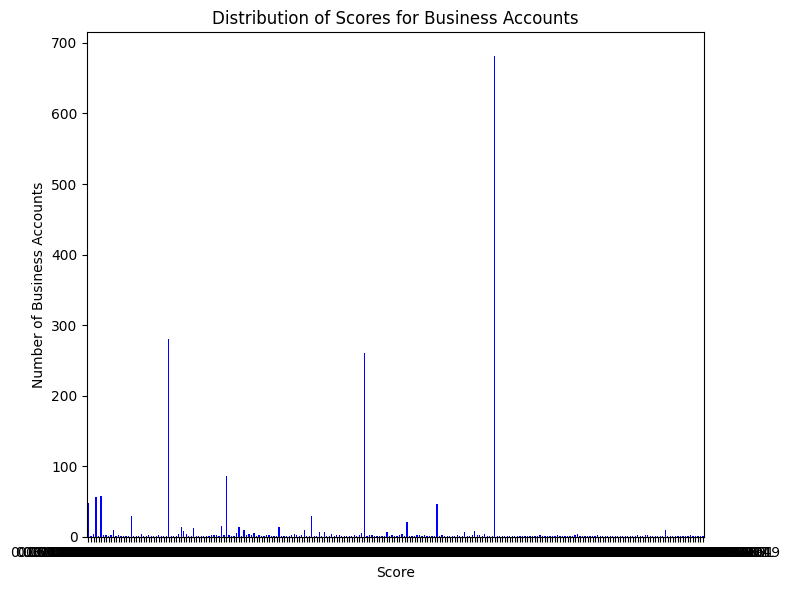

In [55]:
# Create a bar chart to visualize the distribution of scores
score_counts = result_df['score'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
score_counts.plot(kind='bar', color='blue')
plt.xlabel('Score')
plt.ylabel('Number of Business Accounts')
plt.title('Distribution of Scores for Business Accounts')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

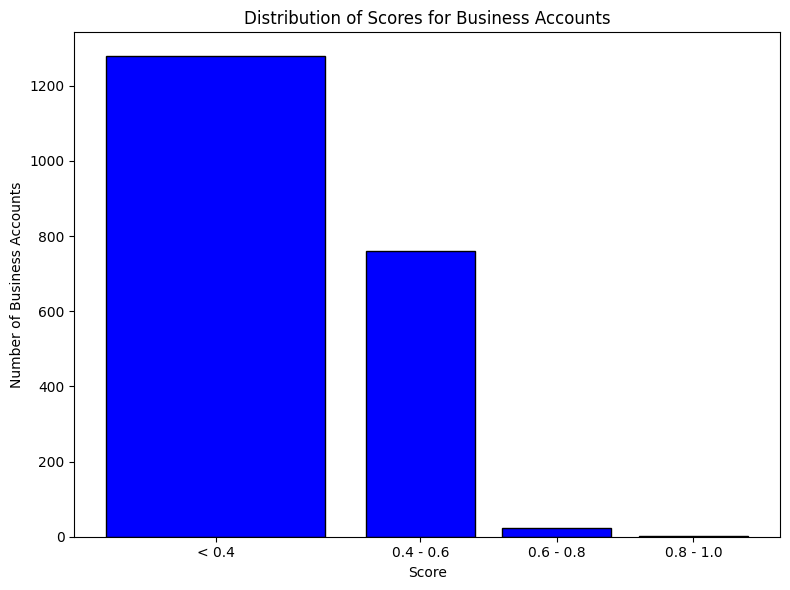

In [58]:
# Create a histogram to visualize the distribution of scores
plt.figure(figsize=(8, 6))
plt.hist(result_df['score'], bins=[0.0, 0.4, 0.6, 0.8, 1.0], rwidth=0.8, color='blue', edgecolor='black')
plt.xlabel('Score')
plt.ylabel('Number of Business Accounts')
plt.title('Distribution of Scores for Business Accounts')
plt.xticks([0.2, 0.5, 0.7, 0.9], ['< 0.4', '0.4 - 0.6', '0.6 - 0.8', '0.8 - 1.0'])

plt.tight_layout()
plt.show()